In [1]:
import numpy as np
from nilearn import image
import nibabel as nib
from nibabel.freesurfer.mghformat import load
import os
import pandas as pd
import json

/home/jacob/.local/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Dice Coefficient
#### Sourced from the interwebz

In [2]:
# https://gist.github.com/JDWarner/6730747

def dice(im1, im2):

    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

# FSL-FreeSurfer Left Hippocampal Dice Overlaps

In [3]:
directory = '/home/jacob/Desktop/Dice_Ducky/FSL_all' #FSL segmentations
directory2 = '/home/jacob/Desktop/Dice_Ducky/nativeSegs' #FreeSurfer segmentations converted to native space

dice_dict_FSL_FreeSurfer = {}
counter = 0

for img_FSL in os.listdir(directory):

    filename_FSL = img_FSL
    print(filename_FSL)
    print(counter)
    counter += 1
    img_FSL = os.path.join(directory, img_FSL) #Construct path
    
    try:
        test_FSL = nib.load(img_FSL)
        data_FSL = test_FSL.get_fdata()
        data_FSL[data_FSL != 17.0] = 0.0 #17 is left hippocampus, so set all non-hippo voxels to 0

        filename_FreeSurfer = filename_FSL[:-7] + "_aseg-in-rawavg.mgz"
        img_FreeSurfer = os.path.join(directory2, filename_FreeSurfer)  #Construct path
        test_FreeSurfer = load(img_FreeSurfer)
        data_FreeSurfer = test_FreeSurfer.get_fdata()
        data_FreeSurfer[data_FreeSurfer != 17.0] = 0.0

        dice_score = dice(data_FreeSurfer,data_FSL)
        print("Dice: " + str(dice_score))
        entry_dict = {'FSL-FreeSurfer': dice_score}
        dice_dict_FSL_FreeSurfer[filename_FSL] = entry_dict
        print(" ")
    except Exception as e:
        print(img_FreeSurfer + " Some damn error")

sub-6852929_ses-NAPFU24_run-002_T1w.nii.gz
0
Dice: 0.0
 
sub-9931234_ses-NAPBL00_run-001_T1w.nii.gz
1
Dice: 0.8230395558639834
 
sub-9939055_ses-NAPFU12_run-001_T1w.nii.gz
2
Dice: 0.8317954126021618
 
sub-9023102_ses-NAPFU48_run-002_T1w.nii.gz
3
Dice: 0.0
 
sub-9249727_ses-NAPFU24_run-001_T1w.nii.gz
4
Dice: 0.771155468091088
 
sub-2663318_ses-NAPFU24_run-002_T1w.nii.gz
5
Dice: 0.8476968796433878
 
sub-9023102_ses-NAPEN00_run-002_T1w.nii.gz
6
Dice: 0.8619967419129625
 
sub-4541749_ses-NAPFU48_run-001_T1w.nii.gz
7
Dice: 0.8515723270440252
 
sub-4317780_ses-PREFU24_run-001_T1w.nii.gz
8
Dice: 0.19406631762652704
 
sub-3169275_ses-PREFU12_run-001_T1w.nii.gz
9
Dice: 0.0
 
sub-7492583_ses-NAPFU03_run-001_T1w.nii.gz
10
Dice: 0.8437853107344633
 
sub-6350639_ses-NAPFU48_run-002_T1w.nii.gz
11
Dice: 0.0
 
sub-2623146_ses-PREBL00_run-001_T1w.nii.gz
12
Dice: 0.0
 
sub-3195342_ses-NAPFU48_run-001_T1w.nii.gz
13
Dice: 0.0
 
sub-4091474_ses-PREEN00_run-001_T1w.nii.gz
14
Dice: 0.8529490258873765
 
sub-6

Dice: 0.026239067055393587
 
sub-2823276_ses-PREFU48_run-002_T1w.nii.gz
123
Dice: 0.8679091280097946
 
sub-2111048_ses-NAPEN00_run-001_T1w.nii.gz
124
Dice: 0.8237579794615598
 
sub-9555827_ses-NAPFU36_run-001_T1w.nii.gz
125
Dice: 0.8330381988363268
 
sub-3230637_ses-NAPEN00_run-001_T1w.nii.gz
126
Dice: 0.8682522715125601
 
sub-6187101_ses-NAPEN00_run-001_T1w.nii.gz
127
Dice: 0.8326437437580254
 
sub-6445003_ses-NAPFU12_run-001_T1w.nii.gz
128
Dice: 0.843667352336174
 
sub-7863306_ses-PREBL00_run-001_UNIT1.nii.gz
129
Dice: 0.8638676844783715
 
sub-4532706_ses-PREFU24_run-002_T1w.nii.gz
130
Dice: 0.0
 
sub-9843864_ses-PREBL00_run-001_T1w.nii.gz
131
Dice: 0.8427754677754677
 
sub-9042627_ses-PREBL00_run-001_T1w.nii.gz
132
Dice: 0.8464190981432361
 
sub-5730499_ses-PREFU12_run-001_T1w.nii.gz
133
Dice: 0.815336013785181
 
sub-9605091_ses-PREFU12_run-001_T1w.nii.gz
134
Dice: 0.0
 
sub-8019820_ses-PREEN00_run-001_T1w.nii.gz
135
Dice: 0.8861538461538462
 
sub-3705605_ses-PREFU36_run-001_T1w.nii

Dice: 0.6947665308680664
 
sub-4943065_ses-PREFU24_run-001_T1w.nii.gz
239
Dice: 0.8275003888629647
 
sub-9555827_ses-NAPFU03_run-001_T1w.nii.gz
240
Dice: 0.0
 
sub-1404211_ses-NAPFU24_run-002_T1w.nii.gz
241
Dice: 0.8539402950932174
 
sub-3360165_ses-NAPBL00_run-001_T1w.nii.gz
242
Dice: 0.0
 
sub-5452448_ses-NAPEN00_run-001_T1w.nii.gz
243
Dice: 0.8538226299694189
 
sub-5985051_ses-NAPBL00_run-001_T1w.nii.gz
244
Dice: 0.0
 
sub-4052945_ses-PREBL00_run-001_T1w.nii.gz
245
Dice: 0.8364177131526768
 
sub-2424540_ses-NAPBL00_run-001_T1w.nii.gz
246
Dice: 0.8422161999397771
 
sub-7243782_ses-NAPFU12_run-001_T1w.nii.gz
247
Dice: 0.8537265842965325
 
sub-2496306_ses-PREBL00_run-001_T1w.nii.gz
248
Dice: 0.8524188609920392
 
sub-7819541_ses-PREBL00_run-001_UNIT1.nii.gz
249
Dice: 0.7841328413284133
 
sub-5360989_ses-PREEN00_run-001_T1w.nii.gz
250
Dice: 0.691713048855906
 
sub-1966913_ses-NAPFU03_run-001_T1w.nii.gz
251
Dice: 0.7589483687044662
 
sub-3692881_ses-PREFU24_run-001_T1w.nii.gz
252
Dice: 0.

Dice: 0.8534749889331562
 
sub-1635604_ses-PREFU48_run-002_T1w.nii.gz
357
Dice: 0.8564509619265438
 
sub-9488568_ses-NAPFU48_run-001_T1w.nii.gz
358
Dice: 0.8496568933250156
 
sub-9909448_ses-PREFU48_run-002_T1w.nii.gz
359
Dice: 0.0
 
sub-4280226_ses-PREBL00_run-001_T1w.nii.gz
360
Dice: 0.8536458333333333
 
sub-9769696_ses-NAPFU36_run-001_T1w.nii.gz
361
Dice: 0.7546922168263551
 
sub-6433158_ses-PREFU12_run-001_T1w.nii.gz
362
Dice: 0.820040899795501
 
sub-4541749_ses-NAPFU36_run-001_T1w.nii.gz
363
Dice: 0.8259033317691225
 
sub-3697357_ses-NAPFU03_run-001_T1w.nii.gz
364
Dice: 0.003303684879288437
 
sub-4052945_ses-PREFU48_run-001_T1w.nii.gz
365
Dice: 0.0
 
sub-9327302_ses-NAPFU03_run-001_T1w.nii.gz
366
Dice: 0.0
 
sub-7492583_ses-NAPEN00_run-001_T1w.nii.gz
367
Dice: 0.8383368569415081
 
sub-1016072_ses-PREFU12_run-001_T1w.nii.gz
368
Dice: 0.8481963927855711
 
sub-8120729_ses-PREFU48_run-001_T1w.nii.gz
369
Dice: 0.0
 
sub-9053120_ses-PREBL00_run-001_UNIT1.nii.gz
370
Dice: 0.8464357489064

Dice: 0.0
 
sub-3692881_ses-PREEN00_run-001_T1w.nii.gz
478
Dice: 0.0
 
sub-3165520_ses-PREFU48_run-001_T1w.nii.gz
479
Dice: 0.0
 
sub-9249727_ses-NAPEN00_run-001_T1w.nii.gz
480
Dice: 0.6071068910948065
 
sub-3301724_ses-PREFU36_run-001_T1w.nii.gz
481
Dice: 0.8629088378566457
 
sub-3048898_ses-PREFU24_run-001_T1w.nii.gz
482
Dice: 0.8263423965022544
 
sub-7945015_ses-NAPFU48_run-002_T1w.nii.gz
483
Dice: 0.8171859785783836
 
sub-1438245_ses-NAPEN00_run-001_T1w.nii.gz
484
Dice: 0.0
 
sub-3697357_ses-NAPEN00_run-001_T1w.nii.gz
485
Dice: 0.0
 
sub-3475739_ses-PREBL00_run-001_T1w.nii.gz
486
Dice: 0.0
 
sub-9191774_ses-NAPFU24_run-001_T1w.nii.gz
487
Dice: 0.0
 
sub-1177880_ses-PREFU24_run-001_T1w.nii.gz
488
Dice: 0.851972708395135
 
sub-4317780_ses-PREEN00_run-001_T1w.nii.gz
489
Dice: 0.0
 
sub-5774407_ses-NAPBL00_run-001_T1w.nii.gz
490
Dice: 0.0
 
sub-8916796_ses-NAPEN00_run-001_T1w.nii.gz
491
Dice: 0.0
 
sub-4280226_ses-PREBL00_run-001_UNIT1.nii.gz
492
Dice: 0.8384125694162264
 
sub-9939055_

Dice: 0.8538288554858563
 
sub-9939055_ses-NAPBL00_run-001_T1w.nii.gz
596
Dice: 0.0
 
sub-4498598_ses-NAPFU48_run-002_T1w.nii.gz
597
Dice: 0.7895304910955208
 
sub-6360867_ses-NAPEN00_run-001_T1w.nii.gz
598
Dice: 0.8540992448759439
 
sub-1016072_ses-PREFU24_run-002_T1w.nii.gz
599
Dice: 0.0
 
sub-1369125_ses-PREEN00_run-001_T1w.nii.gz
600
Dice: 0.8306354191833776
 
sub-1626987_ses-NAPFU12_run-001_T1w.nii.gz
601
Dice: 0.8076466397530278
 
sub-9889544_ses-PREFU12_run-001_T1w.nii.gz
602
Dice: 0.0
 
sub-4052945_ses-PREFU48_run-002_T1w.nii.gz
603
Dice: 0.0
 
sub-4696223_ses-NAPBL00_run-001_T1w.nii.gz
604
Dice: 0.8161668839634941
 
sub-4360628_ses-NAPFU24_run-002_T1w.nii.gz
605
Dice: 0.8547676029726666
 
sub-6605596_ses-NAPFU03_run-001_T1w.nii.gz
606
Dice: 0.0
 
sub-6781586_ses-PREEN00_run-001_T1w.nii.gz
607
Dice: 0.8442065673369015
 
sub-4538817_ses-NAPEN00_run-001_T1w.nii.gz
608
Dice: 0.8666118227758843
 
sub-5985051_ses-NAPFU24_run-002_T1w.nii.gz
609
Dice: 0.0
 
sub-4532706_ses-PREBL00_run

Dice: 0.0
 
sub-2161762_ses-NAPFU12_run-001_T1w.nii.gz
709
Dice: 0.8831454495463293
 
sub-6852929_ses-NAPFU24_run-001_T1w.nii.gz
710
Dice: 0.0
 
sub-3360165_ses-NAPFU12_run-001_T1w.nii.gz
711
Dice: 0.0
 
sub-9690995_ses-NAPFU24_run-001_T1w.nii.gz
712
Dice: 0.0
 
sub-6360867_ses-NAPFU12_run-001_T1w.nii.gz
713
Dice: 0.0
 
sub-7237992_ses-PREFU36_run-001_T1w.nii.gz
714
Dice: 0.0
 
sub-4498598_ses-NAPFU36_run-001_T1w.nii.gz
715
Dice: 0.8683853459972863
 
sub-2496306_ses-PREFU12_run-001_T1w.nii.gz
716
Dice: 0.859192607003891
 
sub-4360628_ses-NAPFU03_run-001_T1w.nii.gz
717
Dice: 0.8378512807759264
 
sub-9026274_ses-NAPBL00_run-001_T1w.nii.gz
718
Dice: 0.0
 
sub-8822042_ses-NAPBL00_run-001_T1w.nii.gz
719
Dice: 0.0
 
sub-2111048_ses-NAPFU12_run-001_T1w.nii.gz
720
Dice: 0.8319706794474203
 
sub-7760229_ses-PREBL00_run-001_T1w.nii.gz
721
Dice: 0.84931157572667
 
sub-4806541_ses-NAPFU24_run-001_T1w.nii.gz
722
Dice: 0.0
 
sub-9690995_ses-NAPFU24_run-002_T1w.nii.gz
723
Dice: 0.11647727272727272
 


Dice: 0.8068524550609241
 
sub-7568597_ses-PREBL00_run-001_T1w.nii.gz
827
Dice: 0.8340356123419872
 
sub-6519252_ses-NAPBL00_run-001_T1w.nii.gz
828
Dice: 0.8510522000546598
 
sub-3048898_ses-PREFU36_run-001_T1w.nii.gz
829
Dice: 0.828794306829068
 
sub-7658604_ses-NAPFU24_run-001_T1w.nii.gz
830
Dice: 0.0
 
sub-1984879_ses-PREBL00_run-001_T1w.nii.gz
831
Dice: 0.8585090730750368
 
sub-6404099_ses-PREFU12_run-001_T1w.nii.gz
832
Dice: 0.8341109383100052
 
sub-7243782_ses-NAPFU36_run-001_T1w.nii.gz
833
Dice: 0.8567578493464493
 
sub-9155520_ses-NAPBL00_run-001_T1w.nii.gz
834
Dice: 0.8345624385447394
 
sub-7863306_ses-PREBL00_run-001_T1map.nii.gz
835
/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7863306_ses-PREBL00_run-001_T1map_aseg-in-rawavg.mgz Some damn error
sub-4628515_ses-NAPFU24_run-001_T1w.nii.gz
836
Dice: 0.7367862824818808
 
sub-1076159_ses-NAPBL00_run-001_T1w.nii.gz
837
Dice: 0.8274538745387454
 
sub-5707288_ses-PREBL00_run-001_UNIT1.nii.gz
838
Dice: 0.8667170571932477
 
sub-30488

Dice: 0.8132140399174123
 
sub-9827494_ses-PREBL00_run-001_T1w.nii.gz
943
Dice: 0.8475097929490767
 
sub-1176949_ses-PREBL00_run-001_T1w.nii.gz
944
Dice: 0.8436323057609151
 
sub-6433158_ses-PREEN00_run-001_T1w.nii.gz
945
Dice: 0.8484389208851167
 
sub-1263509_ses-PREEN00_run-001_T1w.nii.gz
946
Dice: 0.8520917678812415
 
sub-3756689_ses-NAPEN00_run-001_T1w.nii.gz
947
Dice: 0.8558629185799081
 
sub-6350639_ses-NAPFU36_run-001_T1w.nii.gz
948
Dice: 0.7669693039342845
 
sub-9690995_ses-NAPFU03_run-001_T1w.nii.gz
949
Dice: 0.7806433721575152
 
sub-6788676_ses-PREBL00_run-001_T1w.nii.gz
950
Dice: 0.02244718309859155
 
sub-5984591_ses-NAPFU12_run-001_T1w.nii.gz
951
Dice: 0.0
 
sub-3276299_ses-PREBL00_run-001_T1w.nii.gz
952
Dice: 0.7491438356164384
 
sub-5774407_ses-NAPFU48_run-002_T1w.nii.gz
953
Dice: 0.0
 
sub-3531206_ses-NAPFU12_run-002_T1w.nii.gz
954
Dice: 0.8285520668624351
 
sub-7237992_ses-PREFU12_run-001_T1w.nii.gz
955
Dice: 0.0
 
sub-3360165_ses-NAPFU36_run-001_T1w.nii.gz
956
Dice: 0.

Dice: 0.0
 
sub-1004359_ses-PREFU24_run-001_T1w.nii.gz
1060
Dice: 0.8673508171797796
 
sub-4067832_ses-PREBL00_run-001_T1w.nii.gz
1061
Dice: 0.8323192302249894
 
sub-7178383_ses-NAPEN00_run-001_T1w.nii.gz
1062
Dice: 0.8279854032968416
 
sub-7125565_ses-PREFU12_run-001_T1w.nii.gz
1063
Dice: 0.8598622417031935
 
sub-4437799_ses-NAPFU24_run-001_T1w.nii.gz
1064
Dice: 0.0998706338939198
 
sub-6865719_ses-NAPBL00_run-001_T1w.nii.gz
1065
Dice: 0.8342471530999578
 
sub-6161064_ses-NAPBL00_run-001_T1w.nii.gz
1066
Dice: 0.18115015974440896
 
sub-4943065_ses-PREFU48_run-002_T1w.nii.gz
1067
Dice: 0.8138355111452729
 
sub-4943065_ses-PREEN00_run-001_T1w.nii.gz
1068
Dice: 0.8222842863442599
 
sub-2336041_ses-PREBL00_run-001_T1w.nii.gz
1069
Dice: 0.0
 
sub-7237992_ses-PREFU12_run-002_T1w.nii.gz
1070
Dice: 0.0
 
sub-9249727_ses-NAPFU12_run-001_T1w.nii.gz
1071
Dice: 0.0
 
sub-3047136_ses-NAPFU03_run-001_T1w.nii.gz
1072
Dice: 0.0
 
sub-6350639_ses-NAPBL00_run-001_T1w.nii.gz
1073
Dice: 0.8379263301500682

Dice: 0.8241379310344827
 
sub-4498598_ses-NAPEN00_run-001_T1w.nii.gz
1174
Dice: 0.0
 
sub-9026274_ses-NAPFU36_run-001_T1w.nii.gz
1175
Dice: 0.0
 
sub-9026274_ses-NAPFU24_run-002_T1w.nii.gz
1176
Dice: 0.0
 
sub-3230637_ses-PREFU12_run-001_T1w.nii.gz
1177
Dice: 0.0
 
sub-3165520_ses-PREFU24_run-002_T1w.nii.gz
1178
Dice: 0.0
 
sub-3191214_ses-PREBL00_run-001_T1w.nii.gz
1179
Dice: 0.8216389930369576
 
sub-3230637_ses-NAPBL00_run-001_T1w.nii.gz
1180
Dice: 0.6197086546700943
 
sub-3475739_ses-PREFU24_run-002_T1w.nii.gz
1181
Dice: 0.0
 
sub-3705605_ses-PREFU12_run-001_T1w.nii.gz
1182
Dice: 0.7835321882784844
 
sub-7055352_ses-PREBL00_run-001_T1w.nii.gz
1183
Dice: 0.8325727324586423
 
sub-4052945_ses-PREEN00_run-001_T1w.nii.gz
1184
Dice: 0.7924929178470255
 
sub-1784075_ses-NAPFU24_run-001_T1w.nii.gz
1185
Dice: 0.0
 
sub-3756689_ses-NAPBL00_run-001_T1w.nii.gz
1186
Dice: 0.8602250318988517
 
sub-6187101_ses-PREFU24_run-002_T1w.nii.gz
1187
Dice: 0.0
 
sub-6433158_ses-PREFU24_run-002_T1w.nii.gz


Dice: 0.0
 
sub-5158901_ses-PREFU12_run-001_T1w.nii.gz
1288
Dice: 0.02051129607609988
 
sub-4091474_ses-PREFU12_run-001_T1w.nii.gz
1289
Dice: 0.0
 
sub-2738676_ses-PREFU12_run-001_T1w.nii.gz
1290
Dice: 0.8405524168236033
 
sub-7658604_ses-NAPBL00_run-001_T1w.nii.gz
1291
Dice: 0.0
 
sub-3017785_ses-NAPFU48_run-002_T1w.nii.gz
1292
Dice: 0.821969696969697
 
sub-6350639_ses-NAPFU48_run-001_T1w.nii.gz
1293
Dice: 0.7476553341148886
 
sub-7125565_ses-PREFU24_run-002_T1w.nii.gz
1294
Dice: 0.0
 
sub-5458966_ses-NAPFU24_run-001_T1w.nii.gz
1295
Dice: 0.8365840801265155
 
sub-7658420_ses-NAPFU24_run-001_T1w.nii.gz
1296
Dice: 0.0
 
sub-3343577_ses-PREFU24_run-002_T1w.nii.gz
1297
Dice: 0.8504928806133626
 
sub-2137252_ses-PREEN00_run-001_T1w.nii.gz
1298
Dice: 0.8268829094483352
 
sub-8469881_ses-PREBL00_run-001_T1w.nii.gz
1299
Dice: 0.8371227230421486
 
sub-2663318_ses-NAPFU12_run-001_T1w.nii.gz
1300
Dice: 0.819087964116621
 


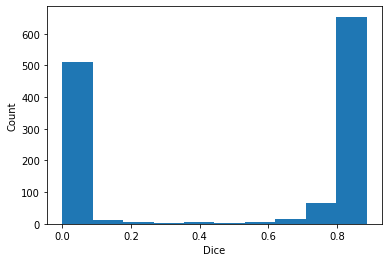

In [4]:
#Dice distribution
import matplotlib.pyplot as plt
dice_list = []

for j,k in dice_dict_FSL_FreeSurfer.items():
    dice_list.append(k['FSL-FreeSurfer'])
# plotting labelled histogram
plt.hist(dice_list)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.show()

# FSL-ASHS

In [5]:
directory = '/home/jacob/Desktop/Dice_Ducky/FSL_all' #FSL
directory2 = '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1'#ASHS

dice_dict_FSL_ASHS = {}
counter = 0

for img_FSL in os.listdir(directory):

    filename_FSL = img_FSL
    print(filename_FSL)
    print(counter)
    counter += 1
    img_FSL = os.path.join(directory, img_FSL)
    
    try:
        test_FSL = nib.load(img_FSL)
        data_FSL = test_FSL.get_fdata()
        data_FSL[data_FSL != 17.0] = 0.0
        #print("FSL shape: " + str(data_FSL.shape))

        filename_ASHS = filename_FSL[:-7] + "/HPC-total_L.nii.gz"
        img_ASHS = os.path.join(directory2, filename_ASHS) 
        test_ASHS = nib.load(img_ASHS)
        data_ASHS = test_ASHS.get_fdata()
        data_ASHS[data_ASHS != 0.0] = 17.0
        data_ASHS = np.flip(data_ASHS, axis=(1, 2)) #Correct for ASHS inverted data stride

        dice_score = dice(data_ASHS,data_FSL)
        print("Dice: " + str(dice_score))
        entry_dict = {'FSL-ASHS': dice_score}
        dice_dict_FSL_ASHS[filename_FSL] = entry_dict
        print(" ")
    except Exception as e:
        print()
        print(img_ASHS + " Some damn error")
        print(e)

sub-6852929_ses-NAPFU24_run-002_T1w.nii.gz
0
Dice: 0.0
 
sub-9931234_ses-NAPBL00_run-001_T1w.nii.gz
1
Dice: 0.816845972185778
 
sub-9939055_ses-NAPFU12_run-001_T1w.nii.gz
2
Dice: 0.8549694475620402
 
sub-9023102_ses-NAPFU48_run-002_T1w.nii.gz
3
Dice: 0.0
 
sub-9249727_ses-NAPFU24_run-001_T1w.nii.gz
4
Dice: 0.7896494156928213
 
sub-2663318_ses-NAPFU24_run-002_T1w.nii.gz
5
Dice: 0.8202645252716108
 
sub-9023102_ses-NAPEN00_run-002_T1w.nii.gz
6
Dice: 0.8409731648741777
 
sub-4541749_ses-NAPFU48_run-001_T1w.nii.gz
7
Dice: 0.8197757976430009
 
sub-4317780_ses-PREFU24_run-001_T1w.nii.gz
8
Dice: 0.21002838221381268
 
sub-3169275_ses-PREFU12_run-001_T1w.nii.gz
9
Dice: 0.0
 
sub-7492583_ses-NAPFU03_run-001_T1w.nii.gz
10
Dice: 0.8232203835040715
 
sub-6350639_ses-NAPFU48_run-002_T1w.nii.gz
11
Dice: 0.0
 
sub-2623146_ses-PREBL00_run-001_T1w.nii.gz
12
Dice: 0.0
 
sub-3195342_ses-NAPFU48_run-001_T1w.nii.gz
13
Dice: 0.0
 
sub-4091474_ses-PREEN00_run-001_T1w.nii.gz
14
Dice: 0.8147612156295224
 
sub-6

Dice: 0.0
 
sub-9748277_ses-NAPFU36_run-001_T1w.nii.gz
105
Dice: 0.8263065179095713
 
sub-3047136_ses-NAPBL00_run-001_T1w.nii.gz
106
Dice: 0.0
 
sub-5261010_ses-PREBL00_run-001_T1w.nii.gz
107
Dice: 0.0
 
sub-2161762_ses-NAPFU03_run-001_T1w.nii.gz
108
Dice: 0.8135016998542982
 
sub-6865719_ses-NAPFU36_run-001_T1w.nii.gz
109
Dice: 0.0
 
sub-5730499_ses-PREFU36_run-001_T1w.nii.gz
110
Dice: 0.0
 
sub-9488568_ses-NAPFU48_run-002_T1w.nii.gz
111
Dice: 0.8404634581105169
 
sub-8822042_ses-NAPFU24_run-001_T1w.nii.gz
112
Dice: 0.0
 
sub-7499557_ses-NAPBL00_run-001_T1w.nii.gz
113
Dice: 0.8377882599580713
 
sub-2017146_ses-NAPFU36_run-001_T1w.nii.gz
114
Dice: 0.04899174448504534
 
sub-7512043_ses-PREBL00_run-001_T1w.nii.gz
115
Dice: 0.8555219364599093
 
sub-7672530_ses-PREFU12_run-001_T1w.nii.gz
116
Dice: 0.8178039951736158
 
sub-8478383_ses-PREFU12_run-001_T1w.nii.gz
117
Dice: 0.0
 
sub-1076159_ses-NAPFU48_run-002_T1w.nii.gz
118
Dice: 0.7979683972911964
 
sub-6909468_ses-PREBL00_run-001_UNIT1.nii

Dice: 0.0
 
sub-7492583_ses-NAPBL00_run-001_T1w.nii.gz
210
Dice: 0.8101756198347108
 
sub-9742435_ses-NAPFU48_run-001_T1w.nii.gz
211
Dice: 0.0
 
sub-8969699_ses-NAPBL00_run-001_T1w.nii.gz
212
Dice: 0.18541610192464084
 
sub-8889872_ses-NAPFU48_run-002_T1w.nii.gz
213
Dice: 0.0
 
sub-2623146_ses-PREFU12_run-001_T1w.nii.gz
214
Dice: 0.8214879961968148
 
sub-9566680_ses-NAPEN00_run-001_T1w.nii.gz
215
Dice: 0.7980926088593299
 
sub-6781586_ses-PREBL00_run-001_T1w.nii.gz
216
Dice: 0.8214833759590793
 
sub-2823276_ses-PREFU24_run-001_T1w.nii.gz
217
Dice: 0.8428712382831771
 
sub-9023102_ses-NAPFU48_run-001_T1w.nii.gz
218
Dice: 0.0
 
sub-8019820_ses-PREFU12_run-001_T1w.nii.gz
219
Dice: 0.8186073727325922
 
sub-4676902_ses-NAPBL00_run-001_T1w.nii.gz
220
Dice: 0.0
 
sub-3531206_ses-NAPFU24_run-002_T1w.nii.gz
221
Dice: 0.8369417424955549
 
sub-4541749_ses-NAPEN00_run-001_T1w.nii.gz
222
Dice: 0.8301333333333333
 
sub-6445003_ses-NAPEN00_run-001_T1w.nii.gz
223
Dice: 0.8175799408367376
 
sub-5774407


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-4814589_ses-PREBL00_run-001_UNIT1/HPC-total_L.nii.gz Some damn error
No such file or no access: '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-4814589_ses-PREBL00_run-001_UNIT1/HPC-total_L.nii.gz'
sub-9360002_ses-NAPBL00_run-001_T1w.nii.gz
301
Dice: 0.0
 
sub-7550757_ses-PREFU24_run-001_T1w.nii.gz
302
Dice: 0.8400050194503702
 
sub-3619481_ses-NAPFU24_run-002_T1w.nii.gz
303
Dice: 0.0
 
sub-4040157_ses-PREEN00_run-001_T1w.nii.gz
304
Dice: 0.0
 
sub-1711090_ses-PREBL00_run-001_T1w.nii.gz
305
Dice: 0.8302955665024631
 
sub-6187101_ses-PREFU24_run-001_T1w.nii.gz
306
Dice: 0.8262599469496021
 
sub-6424373_ses-NAPFU03_run-001_T1w.nii.gz
307
Dice: 0.0
 
sub-6851811_ses-NAPFU12_run-001_T1w.nii.gz
308
Dice: 0.0
 
sub-5158901_ses-PREFU12_run-002_T1w.nii.gz
309
Dice: 0.0
 
sub-9360002_ses-NAPFU24_run-002_T1w.nii.gz
310
Dice: 0.0
 
sub-5452448_ses-NAPFU24_run-002_T

Dice: 0.6207534699272967
 
sub-1004359_ses-PREFU36_run-001_T1w.nii.gz
409
Dice: 0.8462083628632175
 
sub-5360989_ses-PREBL00_run-001_T1w.nii.gz
410
Dice: 0.7701984903550462
 
sub-2663318_ses-NAPEN00_run-001_T1w.nii.gz
411
Dice: 0.8266147503435639
 
sub-2017146_ses-NAPFU24_run-002_T1w.nii.gz
412
Dice: 0.0
 
sub-2017146_ses-NAPFU03_run-001_T1w.nii.gz
413
Dice: 0.0
 
sub-8741617_ses-PREBL00_run-001_T1w.nii.gz
414
Dice: 0.8172320694917243
 
sub-1404211_ses-NAPFU36_run-001_T1w.nii.gz
415
Dice: 0.8420510708401977
 
sub-3737955_ses-NAPFU12_run-001_T1w.nii.gz
416
Dice: 0.6959079967905857
 
sub-8822042_ses-NAPEN00_run-001_T1w.nii.gz
417
Dice: 0.0
 
sub-4169074_ses-NAPFU36_run-001_T1w.nii.gz
418
Dice: 0.0
 
sub-5352582_ses-NAPEN00_run-001_T1w.nii.gz
419
Dice: 0.8444734268014347
 
sub-7855613_ses-NAPFU48_run-002_T1w.nii.gz
420
Dice: 0.0
 
sub-5458966_ses-NAPFU48_run-002_T1w.nii.gz
421
Dice: 0.02039451688398529
 
sub-4360628_ses-NAPEN00_run-001_T1w.nii.gz
422
Dice: 0.8360143501909502
 
sub-1322140

Dice: 0.8413221124527381
 
sub-3017785_ses-NAPBL00_run-001_T1w.nii.gz
527
Dice: 0.838388411045722
 
sub-9006164_ses-PREBL00_run-001_T1w.nii.gz
528
Dice: 0.8301989642954484
 
sub-7755697_ses-PREBL00_run-001_T1w.nii.gz
529
Dice: 0.8017181332714186
 
sub-6852929_ses-NAPEN00_run-001_T1w.nii.gz
530
Dice: 0.8262770363552692
 
sub-2757160_ses-NAPBL00_run-001_T1w.nii.gz
531
Dice: 0.8545568824638592
 
sub-4628515_ses-NAPFU03_run-001_T1w.nii.gz
532
Dice: 0.0
 
sub-4040157_ses-PREBL00_run-001_T1w.nii.gz
533
Dice: 0.7749437359339835
 
sub-3619481_ses-NAPFU24_run-001_T1w.nii.gz
534
Dice: 0.0
 
sub-9742435_ses-NAPFU36_run-001_T1w.nii.gz
535
Dice: 0.832796184091788
 
sub-1984879_ses-PREFU36_run-001_T1w.nii.gz
536
Dice: 0.8105925662035388
 
sub-7755697_ses-PREFU36_run-001_T1w.nii.gz
537
Dice: 0.0
 
sub-3137570_ses-NAPFU24_run-002_T1w.nii.gz
538
Dice: 0.0
 
sub-3195342_ses-NAPFU24_run-001_T1w.nii.gz
539
Dice: 0.0
 
sub-6690963_ses-NAPFU24_run-001_T1w.nii.gz
540
Dice: 0.0
 
sub-3102543_ses-NAPFU12_run-0

Dice: 0.629694105943795
 
sub-5692079_ses-PREFU12_run-001_T1w.nii.gz
630
Dice: 0.631089791635437
 
sub-9931234_ses-NAPFU24_run-002_T1w.nii.gz
631
Dice: 0.0
 
sub-9779747_ses-NAPBL00_run-001_T1w.nii.gz
632
Dice: 0.0
 
sub-5558904_ses-PREBL00_run-001_T1w.nii.gz
633
Dice: 0.8235294117647058
 
sub-6350639_ses-NAPFU24_run-001_T1w.nii.gz
634
Dice: 0.7844104588061174
 
sub-6445003_ses-NAPBL00_run-001_T1w.nii.gz
635
Dice: 0.0
 
sub-9488568_ses-NAPFU03_run-001_T1w.nii.gz
636
Dice: 0.8352754999280679
 
sub-5219094_ses-PREFU12_run-001_T1map.nii.gz
637

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5219094_ses-PREFU12_run-001_T1map/HPC-total_L.nii.gz Some damn error
No such file or no access: '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5219094_ses-PREFU12_run-001_T1map/HPC-total_L.nii.gz'
sub-7855613_ses-NAPEN00_run-001_T1w.nii.gz
638
Dice: 0.688247890162489
 
sub-5452448_ses-NAPFU24_run-001_T1w.nii.gz
639
D

Dice: 0.8588014981273409
 
sub-2757160_ses-NAPFU24_run-002_T1w.nii.gz
728
Dice: 0.8562776025236593
 
sub-2757160_ses-NAPFU12_run-001_T1w.nii.gz
729
Dice: 0.8446356275303644
 
sub-5219094_ses-PREEN00_run-001_T1w.nii.gz
730
Dice: 0.8010899182561307
 
sub-5692079_ses-PREFU48_run-001_T1w.nii.gz
731
Dice: 0.0
 
sub-4101394_ses-PREFU12_run-001_T1w.nii.gz
732
Dice: 0.8185554903112156
 
sub-5817042_ses-NAPEN00_run-001_T1w.nii.gz
733
Dice: 0.0
 
sub-2757160_ses-NAPFU03_run-001_T1w.nii.gz
734
Dice: 0.8535887548202513
 
sub-9769696_ses-NAPFU24_run-002_T1w.nii.gz
735
Dice: 0.0
 
sub-3475739_ses-PREFU12_run-001_T1w.nii.gz
736
Dice: 0.8339902619986088
 
sub-7945015_ses-NAPFU24_run-001_T1w.nii.gz
737
Dice: 0.8265193370165745
 
sub-3084846_ses-PREFU12_run-001_T1w.nii.gz
738
Dice: 0.0
 
sub-7492583_ses-NAPFU36_run-001_T1w.nii.gz
739
Dice: 0.8225742047118328
 
sub-1784075_ses-NAPEN00_run-001_T1w.nii.gz
740
Dice: 0.0
 
sub-7672530_ses-PREFU24_run-003_T1w.nii.gz
741
Dice: 0.7655583972719523
 
sub-8916796_

Dice: 0.8296943231441049
 
sub-7243782_ses-NAPFU36_run-001_T1w.nii.gz
833
Dice: 0.8255195746737555
 
sub-9155520_ses-NAPBL00_run-001_T1w.nii.gz
834
Dice: 0.8309715451762839
 
sub-7863306_ses-PREBL00_run-001_T1map.nii.gz
835

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7863306_ses-PREBL00_run-001_T1map/HPC-total_L.nii.gz Some damn error
No such file or no access: '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7863306_ses-PREBL00_run-001_T1map/HPC-total_L.nii.gz'
sub-4628515_ses-NAPFU24_run-001_T1w.nii.gz
836
Dice: 0.7073684210526315
 
sub-1076159_ses-NAPBL00_run-001_T1w.nii.gz
837
Dice: 0.8142324093816631
 
sub-5707288_ses-PREBL00_run-001_UNIT1.nii.gz
838

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5707288_ses-PREBL00_run-001_UNIT1/HPC-total_L.nii.gz Some damn error
No such file or no access: '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T07

Dice: 0.8327670819177048
 
sub-4538817_ses-NAPBL00_run-001_T1w.nii.gz
918
Dice: 0.0
 
sub-7819541_ses-PREBL00_run-001_T1w.nii.gz
919
Dice: 0.800444074382459
 
sub-3191214_ses-PREFU12_run-001_T1w.nii.gz
920
Dice: 0.7790973871733967
 
sub-9360002_ses-NAPEN00_run-001_T1w.nii.gz
921
Dice: 0.0
 
sub-4676902_ses-NAPFU03_run-001_T1w.nii.gz
922
Dice: 0.8491446345256609
 
sub-6605596_ses-NAPFU24_run-001_T1w.nii.gz
923
Dice: 0.0
 
sub-5458966_ses-NAPFU12_run-001_T1w.nii.gz
924
Dice: 0.03264064875823619
 
sub-4538817_ses-NAPFU24_run-002_T1w.nii.gz
925
Dice: 0.8134266397817578
 
sub-6424373_ses-NAPFU24_run-001_T1w.nii.gz
926
Dice: 0.0
 
sub-3102543_ses-NAPEN00_run-001_T1w.nii.gz
927
Dice: 0.0
 
sub-9488568_ses-NAPFU24_run-003_T1w.nii.gz
928
Dice: 0.8365138137282826
 
sub-3737955_ses-NAPFU03_run-001_T1w.nii.gz
929
Dice: 0.0
 
sub-7863306_ses-PREBL00_run-001_T1w.nii.gz
930
Dice: 0.8538946420531293
 
sub-7945015_ses-NAPFU48_run-001_T1w.nii.gz
931
Dice: 0.7917414721723519
 
sub-7917918_ses-NAPEN00_run

Dice: 0.8371511870054145
 
sub-9748277_ses-NAPFU48_run-001_T1w.nii.gz
1019
Dice: 0.8282946188864246
 
sub-8120729_ses-PREEN00_run-001_T1w.nii.gz
1020
Dice: 0.0
 
sub-2424540_ses-NAPFU48_run-002_T1w.nii.gz
1021
Dice: 0.0009844942160964804
 
sub-8120729_ses-PREFU12_run-001_T1w.nii.gz
1022
Dice: 0.0
 
sub-1527281_ses-PREEN00_run-001_T1w.nii.gz
1023
Dice: 0.8233248319035474
 
sub-6008569_ses-PREFU12_run-001_T1w.nii.gz
1024
Dice: 0.0
 
sub-3692881_ses-PREBL00_run-001_T1w.nii.gz
1025
Dice: 0.0
 
sub-7620567_ses-NAPFU24_run-001_T1w.nii.gz
1026
Dice: 0.851985559566787
 
sub-1284264_ses-NAPFU24_run-001_T1w.nii.gz
1027
Dice: 0.0
 
sub-3017785_ses-NAPFU24_run-001_T1w.nii.gz
1028
Dice: 0.8379862700228833
 
sub-7055352_ses-PREEN00_run-001_T1w.nii.gz
1029
Dice: 0.8347331696601629
 
sub-6445003_ses-NAPFU48_run-001_T1w.nii.gz
1030
Dice: 0.0
 
sub-4052945_ses-PREFU24_run-001_T1w.nii.gz
1031
Dice: 0.0
 
sub-9843864_ses-PREBL00_run-001_T1map.nii.gz
1032

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20

Dice: 0.0
 
sub-9742435_ses-NAPEN00_run-001_T1w.nii.gz
1115
Dice: 0.8353802257784394
 
sub-7492583_ses-NAPFU12_run-001_T1w.nii.gz
1116
Dice: 0.8161281849225112
 
sub-4718998_ses-NAPFU03_run-001_T1w.nii.gz
1117
Dice: 0.8386759125997645
 
sub-6704921_ses-PREBL00_run-001_T1w.nii.gz
1118
Dice: 0.0
 
sub-5261010_ses-PREFU12_run-001_T1w.nii.gz
1119
Dice: 0.0
 
sub-4317780_ses-PREFU24_run-002_T1w.nii.gz
1120
Dice: 0.8330831172376143
 
sub-4351499_ses-NAPFU12_run-001_T1w.nii.gz
1121
Dice: 0.8349468148679335
 
sub-3705605_ses-PREBL00_run-001_T1w.nii.gz
1122
Dice: 0.0
 
sub-6851811_ses-NAPEN00_run-001_T1w.nii.gz
1123
Dice: 0.8495421925266023
 
sub-3692881_ses-PREFU36_run-001_T1w.nii.gz
1124
Dice: 0.8492564459184765
 
sub-4538817_ses-NAPFU36_run-001_T1w.nii.gz
1125
Dice: 0.0
 
sub-4169074_ses-NAPBL00_run-001_T1w.nii.gz
1126
Dice: 0.0
 
sub-9488568_ses-NAPFU24_run-002_T1w.nii.gz
1127
Dice: 0.0
 
sub-9522570_ses-PREEN00_run-001_T1w.nii.gz
1128
Dice: 0.8347033992446123
 
sub-3191214_ses-PREEN00_run-

Dice: 0.04005340453938585
 
sub-4210489_ses-PREBL00_run-001_T1w.nii.gz
1212
Dice: 0.8431240758166421
 
sub-9843864_ses-PREEN00_run-001_T1w.nii.gz
1213
Dice: 0.8238567626421486
 
sub-8120729_ses-PREFU48_run-002_T1w.nii.gz
1214
Dice: 0.0
 
sub-8120729_ses-PREFU24_run-002_T1w.nii.gz
1215
Dice: 0.8069493378690317
 
sub-1443924_ses-NAPFU03_run-001_T1w.nii.gz
1216
Dice: 0.8430856892395354
 
sub-9939055_ses-NAPFU48_run-001_T1w.nii.gz
1217
Dice: 0.0
 
sub-5707288_ses-PREEN00_run-001_T1w.nii.gz
1218
Dice: 0.8405698778833107
 
sub-6161064_ses-NAPFU12_run-001_T1w.nii.gz
1219
Dice: 0.011387360030366294
 
sub-3705605_ses-PREFU48_run-002_T1w.nii.gz
1220
Dice: 0.0
 
sub-4541749_ses-NAPFU12_run-001_T1w.nii.gz
1221
Dice: 0.8216990224425169
 
sub-1626987_ses-NAPBL00_run-001_T1w.nii.gz
1222
Dice: 0.0
 
sub-8741617_ses-PREEN00_run-001_T1w.nii.gz
1223
Dice: 0.8208269525267994
 
sub-5030375_ses-PREBL00_run-001_T1w.nii.gz
1224
Dice: 0.7868351617830857
 
sub-5707288_ses-PREBL00_run-001_T1w.nii.gz
1225
Dice: 0

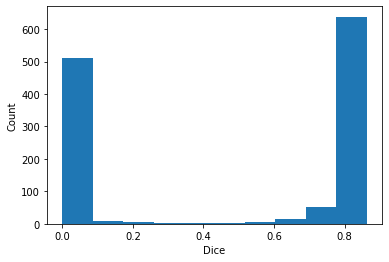

In [6]:
#Dice distribution
import matplotlib.pyplot as plt
dice_list = []

for j,k in dice_dict_FSL_ASHS.items():
    try:
        dice_list.append(k['FSL-ASHS'])
    except:
        print("skipped " + j)
# plotting labelled histogram
plt.hist(dice_list)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.show()

# ASHS-FreeSurfer

In [7]:
directory = '/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1'#ASHS
directory2 = '/home/jacob/Desktop/Dice_Ducky/nativeSegs' #FreeSurfer converted to native space
dice_dict_ASHS_FreeSurfer = {}
counter = 0

for img_ASHS in os.listdir(directory):
    bids_id = img_ASHS
    filename_ASHS = img_ASHS + "/HPC-total_L.nii.gz"
    print(filename_ASHS)
    print(counter)
    counter += 1
    img_ASHS = os.path.join(directory, filename_ASHS)
    
    try:
        test_ASHS = nib.load(img_ASHS)
        data_ASHS = test_ASHS.get_fdata()
        data_ASHS[data_ASHS != 0.0] = 17.0
        data_ASHS = np.flip(data_ASHS, axis=(1, 2)) #Correct for ASHS inverted data stride

        filename_FreeSurfer = bids_id + "_aseg-in-rawavg.mgz"
        img_FreeSurfer = os.path.join(directory2, filename_FreeSurfer) 
        test_FreeSurfer = load(img_FreeSurfer)
        data_FreeSurfer = test_FreeSurfer.get_fdata()
        data_FreeSurfer[data_FreeSurfer != 17.0] = 0.0

        dice_score = dice(data_FreeSurfer,data_ASHS)
        
        print("Dice: " + str(dice_score))
        entry_dict = {'ASHS-FreeSurfer': dice_score}
        dice_dict_ASHS_FreeSurfer[filename_ASHS] = entry_dict
        print(" ")
    except Exception as e:
        print()
        print(img_ASHS + " Some damn error")
        print(e)

sub-7855613_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
0
Dice: 0.8492429229756419
 
sub-1000173_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-1000173_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-1000173_ses-NAPFU03_run-001_T1w_aseg-in-rawavg.mgz'
sub-9650197_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
2
Dice: 0.858038029386344
 
sub-3137570_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
3
Dice: 0.8101045296167247
 
sub-8120729_ses-PREFU48_run-001_T1w/HPC-total_L.nii.gz
4
Dice: 0.8299804575238533
 
sub-2757160_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
5
Dice: 0.846815834767642
 
sub-6332669_ses-NAPFU48_run-001_T1w/HPC-total_L.nii.gz
6

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6332669_ses-NAPFU48_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No suc

Dice: 0.848613070051716
 
sub-7265146_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
60

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7265146_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7265146_ses-NAPFU03_run-001_T1w_aseg-in-rawavg.mgz'
sub-1284264_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
61
Dice: 0.8424422050978068
 
sub-8477651_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
62
Dice: 0.8442722744881018
 
sub-7395962_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
63

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7395962_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7395962_ses-NAPBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-7658604_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
64
Dice: 0.861189252109807
 
sub-3475739_ses-

Dice: 0.8246685878962536
 
sub-5984591_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
119
Dice: 0.8547828403943512
 
sub-9650197_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
120
Dice: 0.8573896145957033
 
sub-4943065_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
121
Dice: 0.8279430789133247
 
sub-5984591_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
122
Dice: 0.8447254049782694
 
sub-4676902_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
123

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-4676902_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-4676902_ses-NAPFU36_run-001_T1w_aseg-in-rawavg.mgz'
sub-9555827_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
124
Dice: 0.8381779708208041
 
sub-7178383_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
125
Dice: 0.8362401966522299
 
sub-9650197_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
126
Dice: 0.8484036615315919
 
sub-8889872_ses-NA

Dice: 0.8357618651124064
 
sub-7658420_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
184
Dice: 0.8386155940112775
 
sub-4040157_ses-PREFU24_run-002_T1w/HPC-total_L.nii.gz
185
Dice: 0.8100497633207914
 
sub-3594014_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
186
Dice: 0.8594253317871409
 
sub-1076159_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
187
Dice: 0.8364639432549587
 
sub-6743559_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
188
Dice: 0.8437468558205051
 
sub-2924615_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
189
Dice: 0.0
 
sub-5967806_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
190

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5967806_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-5967806_ses-NAPFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-1002928_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
191

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T07

Dice: 0.8501993056448502
 
sub-6360867_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
253
Dice: 0.8368896925858951
 
sub-6360867_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
254
Dice: 0.8399667339907331
 
sub-4437799_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
255
Dice: 0.8478679504814305
 
sub-3137570_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
256
Dice: 0.8207641751141806
 
sub-7863867_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
257

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7863867_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7863867_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-2623146_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
258
Dice: 0.8367528991971455
 
sub-7243782_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
259
Dice: 0.8451352907311457
 
sub-6690963_ses-NAPFU48_run-001_T1w/HPC-total_L.nii.gz
260
Dice: 0.8542138514721659
 
sub-8889872_ses-NA

Dice: 0.8203766906838579
 
sub-6008569_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
318
Dice: 0.8482584066530071
 
sub-4538817_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
319
Dice: 0.8273389112246007
 
sub-3230637_ses-PREFU48_run-001_T1w/HPC-total_L.nii.gz
320
Dice: 0.8233349078885215
 
sub-9827494_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
321
Dice: 0.8403041825095057
 
sub-2416212_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
322

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-2416212_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-2416212_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-9555827_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
323
Dice: 0.846686007587592
 
sub-3276299_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
324
Dice: 0.8121335137573297
 
sub-7098391_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
325
Dice: 0.8397759103641457
 
sub-9488568_ses-NAP


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-2599481_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-2599481_ses-PREFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-1984879_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
377
Dice: 0.868839336763865
 
sub-2757160_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
378
Dice: 0.8603049680275455
 
sub-9939055_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
379
Dice: 0.8328965431174342
 
sub-2924615_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
380
Dice: 0.8440216114634719
 
sub-8036701_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
381
Dice: 0.8388020259854657
 
sub-9466302_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
382
Dice: 0.8443157132512672
 
sub-9939055_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
383
Dice: 0.828743114672008
 
sub-3619481_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
384
Dice: 0.8445050179655557
 
sub-7760229_ses-PREE


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5187625_ses-PREFU36_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-5187625_ses-PREFU36_run-001_T1w_aseg-in-rawavg.mgz'
sub-6403227_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
439

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6403227_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-6403227_ses-PREEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-7499557_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
440
Dice: 0.8236333796237849
 
sub-8477651_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
441
Dice: 0.827087734904926
 
sub-9023102_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
442
Dice: 0.8296813803323807
 
sub-4773593_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
443

/home/jacob/Desktop/Dice_Ducky/roi-f

Dice: 0.8636151331153666
 
sub-8351740_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
493
Dice: 0.810288106868707
 
sub-8052813_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
494

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8052813_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8052813_ses-PREFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-3730353_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
495

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-3730353_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-3730353_ses-PREFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-1004359_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
496
Dice: 0.8559898535685461
 
sub-9125564_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
497
Dice: 0.8333887595610243
 
sub-273867

Dice: 0.8497018376536449
 
sub-4538817_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
555
Dice: 0.8324549846288977
 
sub-4696223_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
556
Dice: 0.8178324365872406
 
sub-2924615_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
557
Dice: 0.8381877022653722
 
sub-2345993_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
558
Dice: 0.8594169366034243
 
sub-8822042_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
559
Dice: 0.8304007097441963
 
sub-1626987_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
560
Dice: 0.8080241139174722
 
sub-7395962_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
561

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7395962_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7395962_ses-PREFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-5353353_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
562
Dice: 0.8269601724724839
 
sub-2924615_ses-PR

Dice: 0.8374022280161175
 
sub-1322140_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
620
Dice: 0.8426479203280609
 
sub-6851811_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
621
Dice: 0.8310708898944194
 
sub-1984879_ses-PREFU24_run-003_T1w/HPC-total_L.nii.gz
622
Dice: 0.8598045898659396
 
sub-3102543_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
623
Dice: 0.8442583732057416
 
sub-6360867_ses-NAPFU48_run-001_T1w/HPC-total_L.nii.gz
624
Dice: 0.8365795724465558
 
sub-8916796_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
625

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8916796_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8916796_ses-NAPFU36_run-001_T1w_aseg-in-rawavg.mgz'
sub-6445003_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
626
Dice: 0.867535853976532
 
sub-1322140_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
627
Dice: 0.8307191820611131
 
sub-4317780_ses-PRE


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-9305045_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-9305045_ses-NAPFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-2448082_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
682
Dice: 0.8512938470385278
 
sub-2017146_ses-NAPFU12_run-002_T1w/HPC-total_L.nii.gz
683
Dice: 0.8348188447737006
 
sub-3452929_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
684
Dice: 0.8388294387420834
 
sub-5692079_ses-PREFU48_run-001_T1w/HPC-total_L.nii.gz
685
Dice: 0.806555808111018
 
sub-8052813_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
686

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8052813_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8052813_ses-PREEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-353120

Dice: 0.7990621336459555
 
sub-4532706_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
748
Dice: 0.8427189611766265
 
sub-7658604_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
749
Dice: 0.8560693641618498
 
sub-4351499_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
750
Dice: 0.8391092056686912
 
sub-8504222_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
751

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8504222_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8504222_ses-NAPBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6395760_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
752
Dice: 0.8377754459601259
 
sub-7499557_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
753
Dice: 0.852843662331038
 
sub-4487709_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
754

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-4487709_ses-NAPFU36_run-001_T1w/HPC-total

Dice: 0.839078073089701
 
sub-3048898_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
810
Dice: 0.0
 
sub-1984879_ses-PREFU24_run-002_T1w/HPC-total_L.nii.gz
811
Dice: 0.8592491777248498
 
sub-2773553_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
812

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-2773553_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-2773553_ses-NAPFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-2757160_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
813
Dice: 0.8468085106382979
 
sub-8822042_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
814
Dice: 0.8131336056892117
 
sub-6360867_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
815
Dice: 0.8346798504763053
 
sub-3102543_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
816
Dice: 0.8526871401151631
 
sub-3195342_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
817
Dice: 0.8323541467413581
 
sub-7811445_ses-PREFU12_run-001_T1

Dice: 0.8441575549993413
 
sub-8741617_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
869
Dice: 0.8035606880789126
 
sub-9249727_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
870
Dice: 0.7703608247422681
 
sub-3102543_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
871
Dice: 0.8382775119617225
 
sub-7512043_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
872
Dice: 0.8537644787644788
 
sub-3017785_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
873
Dice: 0.8369650240250307
 
sub-7492583_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
874
Dice: 0.8294064632419209
 
sub-6187101_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
875
Dice: 0.8361008999873242
 
sub-3756689_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
876
Dice: 0.8530377668308703
 
sub-7750196_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
877

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7750196_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky

Dice: 0.8424075350333103
 
sub-7750196_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
931

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7750196_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7750196_ses-NAPEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-9779747_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
932
Dice: 0.8538177072003481
 
sub-5187625_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz
933

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-5187625_ses-PREFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-5187625_ses-PREFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-5458966_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
934
Dice: 0.8313225586159799
 
sub-3705605_ses-PREFU48_run-002_T1w/HPC-total_L.nii.gz
935
Dice: 0.831799534316443
 
sub-762056

Dice: 0.8173710740597131
 
sub-9843864_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1005
Dice: 0.8219588271990018
 
sub-7895257_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1006

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7895257_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7895257_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-5452448_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1007
Dice: 0.8332432724521777
 
sub-1076159_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1008
Dice: 0.8266123902811348
 
sub-9939055_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1009
Dice: 0.8295581136279242
 
sub-6967785_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1010

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6967785_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Des

Dice: 0.8565131143927706
 
sub-7178383_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1060
Dice: 0.8345985737290085
 
sub-4696223_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1061
Dice: 0.8242983467896963
 
sub-3301724_ses-PREFU48_run-002_T1w/HPC-total_L.nii.gz
1062
Dice: 0.840015370821058
 
sub-7917918_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1063
Dice: 0.8524626949399753
 
sub-3165520_ses-PREFU48_run-001_T1w/HPC-total_L.nii.gz
1064
Dice: 0.8119678910240817
 
sub-3047136_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1065
Dice: 0.825547524004747
 
sub-3301724_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1066
Dice: 0.8509017018034036
 
sub-1121981_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1067

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-1121981_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-1121981_ses-NAPBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6424373_

Dice: 0.8446974096875363
 
sub-3119093_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1118

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-3119093_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-3119093_ses-NAPFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-1404211_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1119
Dice: 0.8436839456467036
 
sub-7658604_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1120
Dice: 0.8441799199921943
 
sub-6567917_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1121

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6567917_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-6567917_ses-PREFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-6245599_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
1122
Dice: 0.8500428449014568
 
sub-

Dice: 0.8369931451144418
 
sub-9584420_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1179
Dice: 0.8601669998823944
 
sub-8477651_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1180
Dice: 0.826198154119871
 
sub-1346022_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1181
Dice: 0.8492655911389357
 
sub-1176949_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1182
Dice: 0.8359269697341012
 
sub-2424540_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1183
Dice: 0.8556739811912226
 
sub-3048898_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1184
Dice: 0.8332186281257169
 
sub-3737955_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1185
Dice: 0.8192688759822344
 
sub-8019820_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1186
Dice: 0.8361550300825521
 
sub-8919906_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1187

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8919906_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Di

Dice: 0.8249376558603492
 
sub-7658420_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
1237
Dice: 0.8357857563272513
 
sub-8686311_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1238

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8686311_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8686311_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6519252_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1239
Dice: 0.8385469223007064
 
sub-9360002_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1240
Dice: 0.8450253400906909
 
sub-9748277_ses-NAPFU48_run-002_T1w/HPC-total_L.nii.gz
1241
Dice: 0.8359183673469388
 
sub-9488568_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
1242
Dice: 0.8084859052600988
 
sub-6445003_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1243
Dice: 0.8422431865828093
 
sub-3017785_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1244
Dice: 0.8367867036011081
 
sub-526101

Dice: 0.8328523862375139
 
sub-4487709_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1295

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-4487709_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-4487709_ses-NAPFU12_run-001_T1w_aseg-in-rawavg.mgz'
sub-2424540_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
1296
Dice: 0.8454118873826904
 
sub-3360165_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1297
Dice: 0.8465678198791873
 
sub-5707288_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1298
Dice: 0.8348974626346889
 
sub-5158901_ses-PREFU24_run-002_T1w/HPC-total_L.nii.gz
1299
Dice: 0.8485368206667381
 
sub-2111048_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz
1300
Dice: 0.8384146341463414
 
sub-2161762_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1301
Dice: 0.8097050428163654
 
sub-4365974_ses-PREFU24_run-002_T1w/HPC-total_L.nii.gz
1302
Dice: 0.8395764545144028
 
sub-545896


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-3974587_ses-NAPFU36_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-3974587_ses-NAPFU36_run-001_T1w_aseg-in-rawavg.mgz'
sub-4806541_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1351
Dice: 0.8441546343735444
 
sub-2496306_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1352
Dice: 0.8666075781076888
 
sub-1002928_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1353

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-1002928_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-1002928_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6852929_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1354
Dice: 0.8296703296703297
 
sub-5967806_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1355

/home/jacob/Desktop/Dice_Ducky

Dice: 0.8347930413917216
 
sub-3321114_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1406

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-3321114_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-3321114_ses-NAPFU24_run-001_T1w_aseg-in-rawavg.mgz'
sub-4135058_ses-NAPFU12_run-001_T1w/HPC-total_L.nii.gz
1407
Dice: 0.8501030725434378
 
sub-7161471_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1408
Dice: 0.8464130958112662
 
sub-6350639_ses-NAPFU48_run-001_T1w/HPC-total_L.nii.gz
1409
Dice: 0.8256086142322098
 
sub-9605091_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1410
Dice: 0.8537285993335632
 
sub-1784075_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
1411
Dice: 0.8460992907801419
 
sub-7115186_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1412

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7115186_ses-PREEN00_run-001_T1w/H


/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-8686311_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-8686311_ses-PREEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-9939055_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1470
Dice: 0.825617475487154
 
sub-1176949_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1471
Dice: 0.8410488019069126
 
sub-4280226_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1472
Dice: 0.8452337803552011
 
sub-2161762_ses-NAPBL00_run-001_T1w/HPC-total_L.nii.gz
1473
Dice: 0.8215152986886838
 
sub-8120729_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1474
Dice: 0.8327260682345148
 
sub-9678578_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1475

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-9678578_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desk

Dice: 0.8266389658356418
 
sub-7265146_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz
1528

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-7265146_ses-NAPEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7265146_ses-NAPEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6967785_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz
1529

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6967785_ses-PREEN00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-6967785_ses-PREEN00_run-001_T1w_aseg-in-rawavg.mgz'
sub-9488568_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
1530
Dice: 0.822524609148813
 
sub-7492583_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1531
Dice: 0.826792790489582
 
sub-2245781_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1532

/home/jacob/Desktop/Dice_Ducky/r

Dice: 0.8381820306110527
 
sub-5181071_ses-NAPFU24_run-002_T1w/HPC-total_L.nii.gz
1586
Dice: 0.8540164778578785
 
sub-6755055_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz
1587

/home/jacob/Desktop/Dice_Ducky/roi-fast-ASHS-T1-20221208T074530Z-001/roi-fast-ASHS-T1/sub-6755055_ses-PREBL00_run-001_T1w/HPC-total_L.nii.gz Some damn error
[Errno 2] No such file or directory: '/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-6755055_ses-PREBL00_run-001_T1w_aseg-in-rawavg.mgz'
sub-6433158_ses-PREFU24_run-002_T1w/HPC-total_L.nii.gz
1588
Dice: 0.8375687712863505
 
sub-4628515_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1589
Dice: 0.8453434471133586
 
sub-2137252_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1590
Dice: 0.8552719200887903
 
sub-2448082_ses-PREFU12_run-001_T1w/HPC-total_L.nii.gz
1591
Dice: 0.8474883773670484
 
sub-6161064_ses-NAPFU24_run-001_T1w/HPC-total_L.nii.gz
1592
Dice: 0.8497457235321313
 
sub-6519252_ses-NAPFU03_run-001_T1w/HPC-total_L.nii.gz
1593
Dice: 0.8415804561884582
 
sub-694955

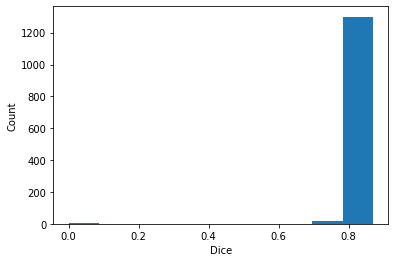

In [8]:
#Dice distribution
import matplotlib.pyplot as plt
dice_list = []

for j,k in dice_dict_ASHS_FreeSurfer.items():
    try:
        dice_list.append(k['ASHS-FreeSurfer'])
    except:
        print("skipped " + j)
# plotting labelled histogram
plt.hist(dice_list)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.show()

# Exporting JSON

In [9]:
#Rename ASHS keys

ASHS_FreeSurfer_rename = {}

for j,k in dice_dict_ASHS_FreeSurfer.items():
    ASHS_FreeSurfer_rename[j[:-19] + ".nii.gz"] = k
    
print(json.dumps(ASHS_FreeSurfer_rename, indent=2))

{
  "sub-7855613_ses-NAPFU48_run-002_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8492429229756419
  },
  "sub-9650197_ses-NAPFU03_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.858038029386344
  },
  "sub-3137570_ses-NAPFU03_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8101045296167247
  },
  "sub-8120729_ses-PREFU48_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8299804575238533
  },
  "sub-2757160_ses-NAPFU36_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.846815834767642
  },
  "sub-3137570_ses-NAPBL00_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8158716005349977
  },
  "sub-7755697_ses-PREEN00_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.862193278288173
  },
  "sub-1016072_ses-PREBL00_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8522855212789913
  },
  "sub-8478383_ses-PREBL00_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8700332073743272
  },
  "sub-2017146_ses-NAPFU48_run-002_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.829441744695982
  },
  "sub-5219094_ses-PREFU12_run-0

In [10]:
# Merge into one big dictionary

final_dict = {}

for j,k in ASHS_FreeSurfer_rename.items():
    final_dict[j] = k

for m,n in dice_dict_FSL_ASHS.items():
    if m in final_dict:
        final_dict[m]['FSL-ASHS'] = n['FSL-ASHS']
    else:
        final_dict[m] = n
        
for p,q in dice_dict_FSL_FreeSurfer.items():
    if p in final_dict:
        final_dict[p]['FSL-FreeSurfer'] = q['FSL-FreeSurfer']
    else:
        final_dict[p] = q

print(len(final_dict))
print(json.dumps(final_dict, indent=2))

1358
{
  "sub-7855613_ses-NAPFU48_run-002_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8492429229756419,
    "FSL-ASHS": 0.0,
    "FSL-FreeSurfer": 0.0
  },
  "sub-9650197_ses-NAPFU03_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.858038029386344,
    "FSL-ASHS": 0.8106734434561627,
    "FSL-FreeSurfer": 0.8465959892706604
  },
  "sub-3137570_ses-NAPFU03_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8101045296167247,
    "FSL-ASHS": 0.0,
    "FSL-FreeSurfer": 0.0
  },
  "sub-8120729_ses-PREFU48_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8299804575238533,
    "FSL-ASHS": 0.0,
    "FSL-FreeSurfer": 0.0
  },
  "sub-2757160_ses-NAPFU36_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.846815834767642,
    "FSL-ASHS": 0.845957011258956,
    "FSL-FreeSurfer": 0.8428954423592493
  },
  "sub-3137570_ses-NAPBL00_run-001_T1w.nii.gz": {
    "ASHS-FreeSurfer": 0.8158716005349977,
    "FSL-ASHS": 0.8353019835079117,
    "FSL-FreeSurfer": 0.8338353413654619
  },
  "sub-7755697_ses-PREEN00_run-001_T

In [11]:
import json
with open("Dice.json", "w") as outfile:
    json.dump(final_dict, outfile, indent=4)